Welcome to day 4 of the regression challenge! So far we've been focusing on examples where we are looking at the effect of **one** input variable on a specific output variable. Today, we're going to be looking at predicting a single output variable using multiple input variables. This is known as "multiple regression".

We're going to be using all the skills we've learned so far, so feel free to head back to the previous day's challenges if you need a quick refresher:

* [Day 1: Learned about different types of regression (Poisson, linear and logistic) and when to use them](https://www.kaggle.com/rtatman/regression-challenge-day-1)
* [Day 2: Learned how to fit & evaluate a model with diagnostic plots](https://www.kaggle.com/rtatman/regression-challenge-day-2)
* [Day 3: Learned how to read and understand models](https://www.kaggle.com/rtatman/regression-challenge-day-3)

If you're already caught up, we can get right to down to fitting and examining a model using multiple regression! 
___

<center>
[**You can check out a video that goes with this notebook by clicking here.**](https://www.youtube.com/embed/iN8Rl8sIzVg)

## Example: Predicting BMI
___

For my multiple regression example, I'm going to be using a dataset of health and eating habits of Americans collected by the US Bureau of Labor Statistics. I'm going to see if we can predict BMI (body mass index, intended to be a rough measure of body fat) using height, weight, how much time each person spends exercising and how much time each person spends eating. 

I'm also reading a dataset of New York City census data for you to use in your exercises.

In [1]:
# libraries we'll need
library(car) # for avplots
library(tidyverse) # for general utility functions

# read in our data 
bmi_data <- read_csv("../input/eating-health-module-dataset//ehresp_2014.csv") %>%
    filter(erbmi > 0) # remove rows where the reported BMI is less than 0 (impossible)
nyc_census <- read_csv("../input/new-york-city-census-data/nyc_census_tracts.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.3.4          ✔ dplyr   0.7.4     
✔ tidyr   0.7.2          ✔ stringr 1.2.0     
✔ readr   1.1.1.9000     ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  County = col_character(),
  Borough = col_character()
)
See spec(...) for full column specifications.


The columns names in the bmi_data dataset aren't very helpful, so I've checked [the documentation](https://www.bls.gov/tus/ehmintcodebk1416.pdf) to figure out which columns have the information I want. After looking through the documentation, I picked out these five variables:

* erbmi = body mass index (this is what I'm going to try to predict!)
* euexfreq = how many times in the past week the person exercised (outside of their job)
* euwgt = weight, in pounds
* euhgt = height, in inches
* ertpreat = amount of time spent eating and drinking (in minutes) over the past week 

With this in mind, I'm going to use the same formula notation we've been using the past few days. I'm just adding four terms instead of one:

In [2]:
# fit a glm model
model <- glm(erbmi ~ euexfreq + euwgt + euhgt + ertpreat, # formula
             data = bmi_data, # dataset
             family = ("gaussian")) # fit a linear model

Now that we've fit our model, let's check out some diagnostic plots. I'm using the plot() function, so we're going to get very slightly different plots than with would with the glm.diag.plots() function from the boot package. 

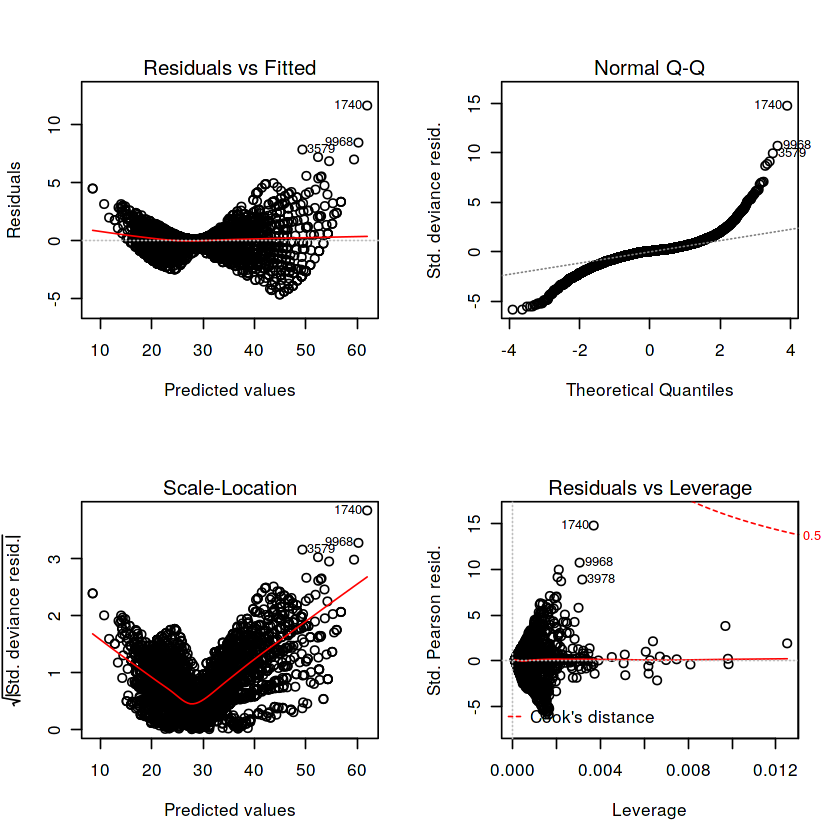

In [3]:
# output plots in a 2 x 2 grid 
par(mfrow = c(2,2)) 
# diagnostic plots
plot(model)

The top two plots are pretty much the same as the ones we saw on day 2, but the bottom two are slightly different.

* **Residuals vs. predicted values**: We don't want to see a pattern here, it should just sort of look like a cloud & the red line in the middle should be more-or-less flat. The pattern we see here, with bigger residuals towards the sides and smaller ones in the center, means that our model is much more accurate for values in the middle range than extreme values (either very high or very low).
* **Normal Q-Q**: We want all our points to be on that dotted line and the line to go across the center diagonal of the plot. The fact that a lot of our residuals are above or below the line suggests that there's a strong skew in our data.
* **Scale-Location**:  This helps you see if your data points are spread out evenly along your predictors (for example, making sure that 20 out of 25 cantaloupes all weigh exactly 1 pound, which might suggest something is up with your dataset). You want points to be scattered randomly and the red line in the middle to be flat(ish). This plot suggests that we have a strong skew in our data. (Which is the same thing the other plots have been telling us).
* **Residuals vs. Leverage**:  This plot will help you look for outliers. If you can see a dotted red line between the bulk of the points and one or two off on their own, those outliers are strongly affecting your analysis. Here we don't have any strong outliers to worry about.

These plots are telling us that we have a pretty strong skew in our data. We can probably trust the predictions we make towards the center of our range (since residuals are very low around 30), but the further away we move from the mean the less we can trust our model. If we want accurate predictions across the range of possible BMI's we probably don't want to use this model. **We can still continue investigating our model, but we should be very cautious in interpreting our results!**

Now that we're aware of some of the pitfalls with this model, we can examine it more closely.

In [4]:
# examine our model
summary(model)


Call:
glm(formula = erbmi ~ euexfreq + euwgt + euhgt + ertpreat, family = ("gaussian"), 
    data = bmi_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6225  -0.3090   0.0484   0.2970  11.6552  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  5.660e+01  1.289e-01  439.005   <2e-16 ***
euexfreq     1.186e-03  2.354e-03    0.504    0.615    
euwgt        1.584e-01  2.005e-04  789.810   <2e-16 ***
euhgt       -8.510e-01  2.139e-03 -397.797   <2e-16 ***
ertpreat    -3.361e-05  1.598e-04   -0.210    0.833    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6244916)

    Null deviance: 404530.3  on 10636  degrees of freedom
Residual deviance:   6639.6  on 10632  degrees of freedom
AIC: 25185

Number of Fisher Scoring iterations: 2


Looking at our model, we can tell that we're pretty sure that the average BMI isn't 0, since the intercept is pretty far from 0 and the standard error for it is relatively small (less than 10% of the estimate). Using that same metric, we can also tell that both weight (euwgt) and height (euhgt) are probably important, but that neither how often someone exercises (euexfreq) nor how much time they spend eating (ertpreat) seem to be particularly informative.

We can also see that all our inputs together are very helpful because there's a large difference between the residual deviance and the null deviance.

So, while we do want to be careful with interpreting this model given that we know it doesn't handle extreme values well, it looks like both weight and height are important for predicting BMI. (Which is good, since BMI is calculated using both weight and height!)

We can double check this using Added-Variable Plots, also known as partial-regression plots. AV Plots are a set of plots, one for each of your input variables, where it shows you what happens to your output variables if you hold all but one input variable stable and just change that one input variable. Each observation is represented by a single point on the plot, and the coefficient is shown using a red line.

You can read these a bit like correlation plots: if an input variable is important, there will be a strong linear pattern in the points and the line will have a slope that's very different from 0. If an input variable isn't important, you won't see a strong pattern in the dots and the red line will just be a flat line at 0.

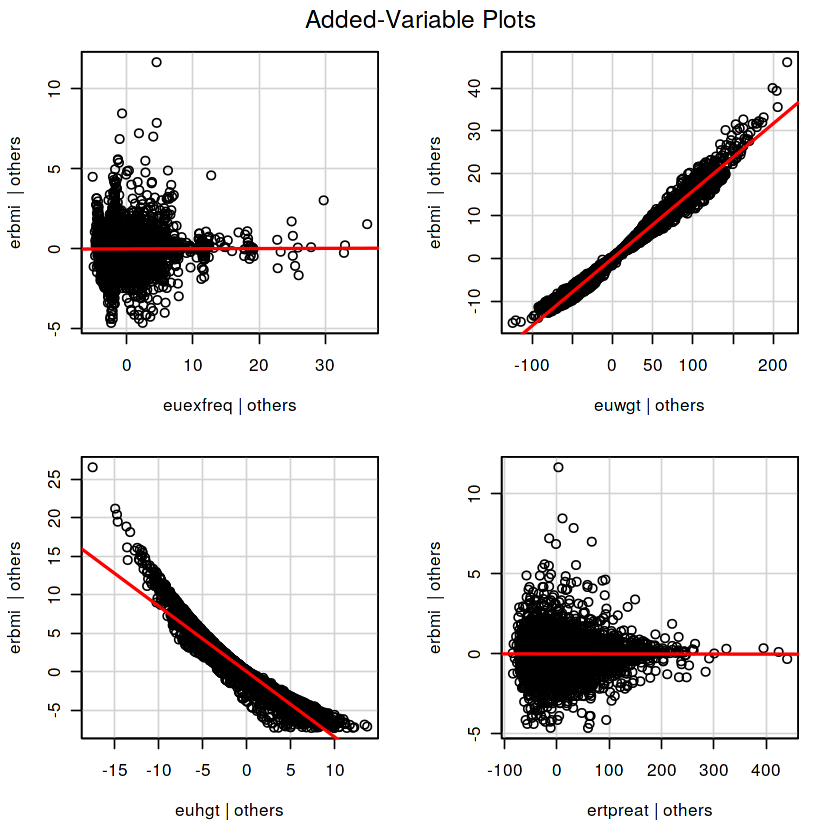

In [5]:
# added-variable plots for our model
avPlots(model)

Looking at these plots, we can see by looking in the top right corner that as euwgt (weight) increases, so does erbmi (BMI, the variable we're trying to predict). Looking at the bottom left corner we can see that as euhgt (height) increases, erbmi actually **decreases**. So both height and weight are important, but they have the opposite effect! We can also tell this from our model summary because euwgt had a *positive* estimate, while euhgt had a *negative* estimate.

The other two plots show that there's not a strong relationship between those variables and the one we're trying to predict, which we already figured out from our model.

And that's it for multiple regression! Now it's time for you to try it yourself. :)

> If you're really dying to know how to fit a model that's a better representation of this particular dataset, you can check out [this notebook](https://www.kaggle.com/rtatman/regression-challenge-day-4-gamma-distribution/), but you don't need it to work on your assignment for today.

## Your turn!
___

Now it's your turn to come up with a model and interpret it!

1. Pick a question to answer to using the NYC Census dataset. Pick a variable to predict and at least three variables to use to predict it.
2. Fit a GLM model of the appropriate family. (Check out [Monday's challenge](https://www.kaggle.com/rtatman/regression-challenge-day-1) if you need a refresher).
3. Plot diagnostic plots for your model. Does it seem like your model is a good fit for your data? If you're fitting a linear or Poisson model, are the residuals normally distributed (no patterns in the first plot and the points in the second plot are all in a line)? Are there any influential outliers?
4. Check out your model using the summary() function. Which, if any, input variables have a strong relationship to the output variable you're predicting?
5. Plot your output variables using the avPlot() function. Do the plots agree with your interpretation of the model summary? 
6. *Optional:* If you want to share your analysis with friends or to ask for help, you’ll need to make it public so that other people can see it.
    * Publish your kernel by hitting the big blue “publish” button. (This may take a second.)
    * Change the visibility to “public” by clicking on the blue “Make Public” text (right above the “Fork Notebook” button).
    * Tag your notebook with 5daychallenge

In [6]:
# remove NAs
nyc_census <- na.omit(nyc_census)

# summarize the dataset
head(nyc_census)
summary(nyc_census)

CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3.6005e+10,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,⋯,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
3.6005e+10,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,⋯,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3.6005e+10,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,⋯,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
3.6005e+10,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,⋯,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
3.6005e+10,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,⋯,4.3,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2
3.6005e+10,Bronx,Bronx,4774,2130,2644,62.3,0.2,36.5,1.0,⋯,14.0,1.5,4.1,42.7,1191,74.2,16.1,9.7,0.0,18.9


  CensusTract           County            Borough             TotalPop    
 Min.   :3.601e+10   Length:2095        Length:2095        Min.   :  120  
 1st Qu.:3.605e+10   Class :character   Class :character   1st Qu.: 2464  
 Median :3.605e+10   Mode  :character   Mode  :character   Median : 3626  
 Mean   :3.605e+10                                         Mean   : 4008  
 3rd Qu.:3.608e+10                                         3rd Qu.: 5010  
 Max.   :3.609e+10                                         Max.   :28926  
      Men            Women          Hispanic         White       
 Min.   :   58   Min.   :   62   Min.   : 0.00   Min.   :  0.00  
 1st Qu.: 1176   1st Qu.: 1274   1st Qu.: 9.10   1st Qu.:  4.05  
 Median : 1728   Median : 1873   Median :18.50   Median : 22.70  
 Mean   : 1907   Mean   : 2101   Mean   :26.70   Mean   : 32.83  
 3rd Qu.: 2392   3rd Qu.: 2603   3rd Qu.:39.85   3rd Qu.: 59.80  
 Max.   :13460   Max.   :15466   Max.   :95.60   Max.   :100.00  
     Black   

In [7]:
model <- glm(Unemployment ~ Hispanic + White + Black + Native + Asian, data=nyc_census, family="gaussian")


Attaching package: ‘boot’

The following object is masked from ‘package:car’:

    logit



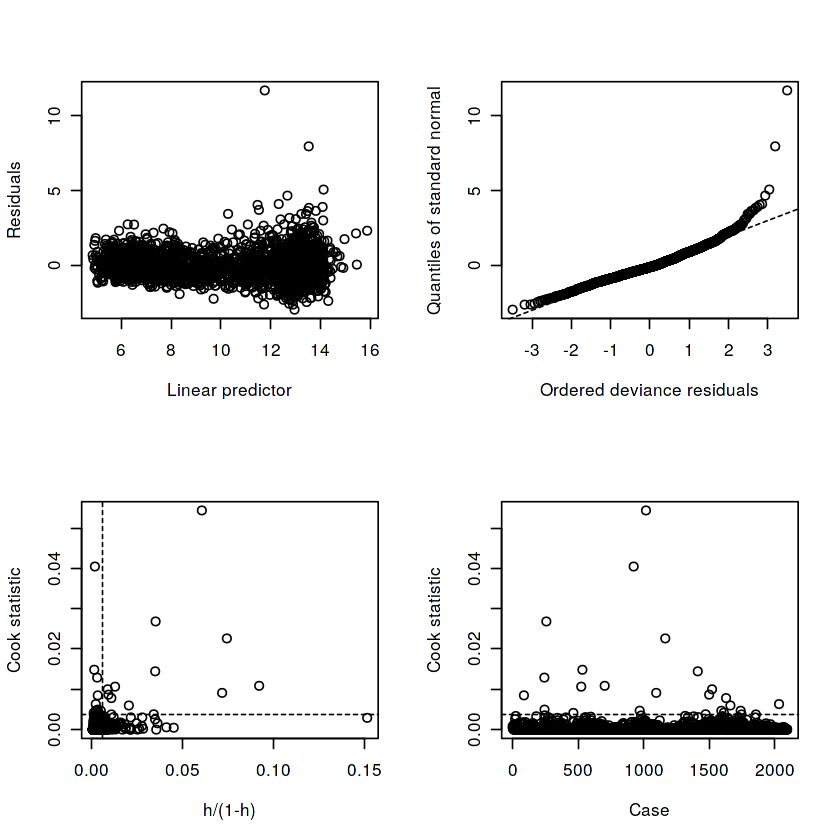

In [8]:
library(boot)
library(car)
glm.diag.plots(model)

In [9]:
summary(model)


Call:
glm(formula = Unemployment ~ Hispanic + White + Black + Native + 
    Asian, family = "gaussian", data = nyc_census)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-12.864   -2.676   -0.487    2.305   50.934  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.53375    2.41551   3.533  0.00042 ***
Hispanic     0.05978    0.02476   2.414  0.01586 *  
White       -0.03687    0.02455  -1.502  0.13331    
Black        0.04597    0.02505   1.835  0.06658 .  
Native       0.46861    0.14676   3.193  0.00143 ** 
Asian       -0.02494    0.02634  -0.947  0.34384    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 18.9868)

    Null deviance: 57908  on 2094  degrees of freedom
Residual deviance: 39663  on 2089  degrees of freedom
AIC: 12120

Number of Fisher Scoring iterations: 2


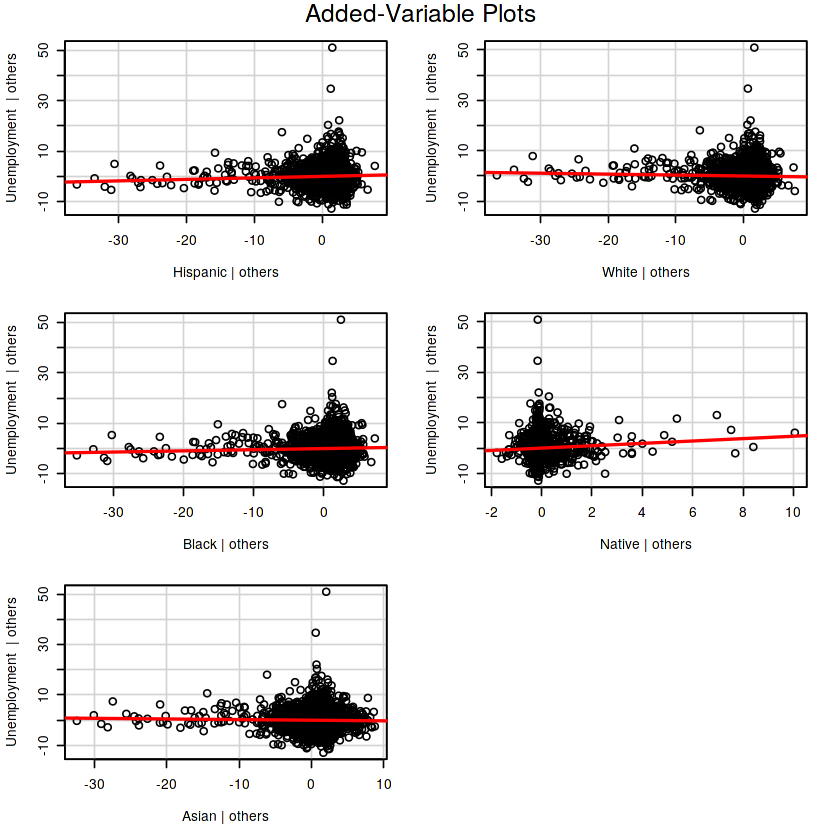

In [10]:
avPlots(model)